# Collecting Bananas with Rainbow DQN
---

## Introduction

This project is part of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program. The goal is to train an agent to navigate and collect bananas in a large, square world.

### Import the Necessary Packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
from dqn_agent import Agent
%matplotlib inline


setting up the environment and brains for the agent

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### Set-Up the Agent

In [9]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

### Train the agent (RAINBOW DQN)

In [13]:
def model(n_episodes=2000):
    """
    Rainbow DQN training function

    Params
    ======
        n_episodes (int): maximum number of training episode
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    avg_scores = []                    # list containing average scores, for plotting purposes

    for i_episode in range(1, n_episodes+1):

        # reset noisy layers
        agent.qnetwork_local.reset_noise()

        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]           # get the current state
        score = 0                                         # initialize the score

        while True:
            action = agent.act(state)                     # select an action
            env_info = env.step(int(action))[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                  # get the reward
            done = env_info.local_done[0]                 # see if episode has finished

            agent.step(state, action, reward, next_state, done)

            score += reward                               # update the score
            state = next_state                            # roll over the state to next time step

            if done:                                      # exit loop if episode finished
                break

        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        avg_scores.append(np.mean(scores_window))

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

        # check if environment is solved
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

            break

        
    # print end of training summary
    print('\n\nTraining Summary:')
    print('==================')
    print('Total Episodes: {}'.format(i_episode))
    print('Average Score: {:.2f}'.format(np.mean(scores_window)))
    print('Max Score: {:.2f}'.format(np.max(scores)))
    print('Min Score: {:.2f}'.format(np.min(scores)))
    print('Std Deviation: {:.2f}'.format(np.std(scores)))
    print('Average of last 100 episodes: {:.2f}'.format(np.mean(scores_window)))

    # save model weights
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')

    # running average with window size 100 starting from episode 0. i.e. at episode 20, the average is taken from episodes 0 to 20
    running_avg = np.zeros(len(avg_scores))
    for i in range(len(avg_scores)):
        running_avg[i] = np.mean(avg_scores[max(0, i-100):(i+1)])

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores, label='Episode Scores')
    # avg score over last 100 episodes
    plt.plot(np.arange(len(running_avg)), running_avg, label='Average Score')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend(loc='upper left')
    plt.show()

Episode 100	Average Score: 3.18
Episode 200	Average Score: 10.43
Episode 300	Average Score: 12.67
Episode 340	Average Score: 13.03
Environment solved in 340 episodes!	Average Score: 13.03


Training Summary:
Total Episodes: 340
Average Score: 13.03
Max Score: 23.00
Min Score: -4.00
Std Deviation: 5.87
Average of last 100 episodes: 13.03


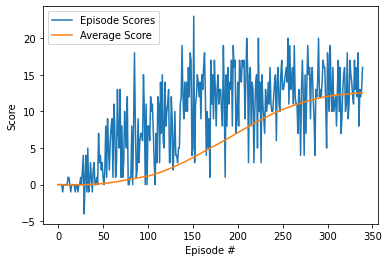

In [11]:
model()

In [12]:
env.close()